# Introduction #

We will going explore two popular approaches for building recommendation systems.Popularity-based Recommendation and Collaborative Filtering Recommendation.These techniques help us provide personalized book recommendations to users based on their interests and preferences.

## Popularity-based Recommendation 

Popularity-based Recommendation is a simple yet effective approach that suggests books based on their overall popularity or popularity within a certain group of users. It recommends books that have received high ratings or have been frequently purchased/read by a large number of users. This approach is suitable when we want to provide general recommendations to a wide range of users.

## Collaborative Filtering Recommendation

Collaborative Filtering Recommendation is a more advanced technique that leverages the collective wisdom of a community of users. It finds similarities in user behavior and preferences to make personalized recommendations. Collaborative Filtering looks for patterns among users who have similar tastes and preferences. It suggests books that have been liked or highly rated by users who share similar interests with the target user.

In this notebook, we will implement both Popularity-based Recommendation and Collaborative Filtering Recommendation techniques to offer diverse and tailored book recommendations.

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#reading datasets
books=pd.read_csv("F:/Projects_Python/Projects/Book_Recom_Sys/Books.csv",low_memory = False)
ratings=pd.read_csv("F:/Projects_Python/Projects/Book_Recom_Sys/Ratings.csv")
users=pd.read_csv("F:/Projects_Python/Projects/Book_Recom_Sys/Users.csv")

Understanding **books** dataset

In [3]:
books.head(2)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...


In [4]:
books.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object')

**books dataset**<br>

1.***ISBN***: ISBN stands for International Standard Book Number. It is a unique numerical identifier used to identify books and other monographic publications. Each ISBN consists of a series of digits that uniquely identify a specific edition or version of a book.<br>
The purpose of an ISBN is to provide a standardized method for identifying and cataloging books. It helps publishers, booksellers, libraries, and other organizations to efficiently manage and track books. By using an ISBN, a book can be easily located, ordered, and sold internationally<br>

2.***Book-Title***: Title of the book

3.***Book-Author***: Author of the book

4.***Year-Of-Publication***:Year-Of-Publication

5.***Publisher***: Publisher is the organization or company responsible for producing and distributing the book to the public. Publishers handle various aspects of the book's publication process, including acquiring manuscripts, editing, designing, printing, marketing, and distributing the book.

6.***Image-URL-S***: short URL of the image 

7.***Image-URL-M***:medium URL of the image

8.***Image-URL-L***:long URL of the image

In [5]:
ratings.head(2)

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5


***ratings dataset***

1.**User-ID**: User id of the reader/customer who reviews the book<br>
2.**ISBN**: Unique idenifier for book whos review has been made<br>
3.**Book-Rating**: Raing of the particular book 


In [6]:
users.head(2)

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0


1.**User-ID**:User id of the reader/customer who reviews the book<br>
2.**Location**:Location<br>
3.**Age**: age<br>

In [7]:
# Check size and missing values of 'books' DataFrame
print("\nShape of 'books' DataFrame:", books.shape)
print("Missing values in 'books' DataFrame:")
print(books.isnull().sum())

# Check shape and missing values of 'ratings' DataFrame
print("\nShape of 'ratings' DataFrame:", ratings.shape)
print("\nMissing values in 'ratings' DataFrame:")
print(ratings.isnull().sum())


# Check  shape and missing values of 'users' DataFrame
print("\nShape of 'users' DataFrame:", users.shape)
print("\nMissing values in 'users' DataFrame:")
print(users.isnull().sum())



Shape of 'books' DataFrame: (271360, 8)
Missing values in 'books' DataFrame:
ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

Shape of 'ratings' DataFrame: (1149780, 3)

Missing values in 'ratings' DataFrame:
User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

Shape of 'users' DataFrame: (278858, 3)

Missing values in 'users' DataFrame:
User-ID          0
Location         0
Age         110762
dtype: int64


As we can see we have lots of missing values in ***age*** column,but age does not have not much significant as we are taking ratings as main feature for our recommendations,so we are planning remove age column.

In [8]:
# Count duplicated rows in 'books' DataFrame
books_duplicates_count = books.duplicated().sum()
print("Duplicated rows count in 'books' DataFrame:", books_duplicates_count)

# Count duplicated rows in 'ratings' DataFrame
ratings_duplicates_count = ratings.duplicated().sum()
print("Duplicated rows count in 'ratings' DataFrame:", ratings_duplicates_count)

# Count duplicated rows in 'users' DataFrame
users_duplicates_count = users.duplicated().sum()
print("Duplicated rows count in 'users' DataFrame:", users_duplicates_count)

Duplicated rows count in 'books' DataFrame: 0
Duplicated rows count in 'ratings' DataFrame: 0
Duplicated rows count in 'users' DataFrame: 0


# EDA

### Top 10 publishers with the most books ###

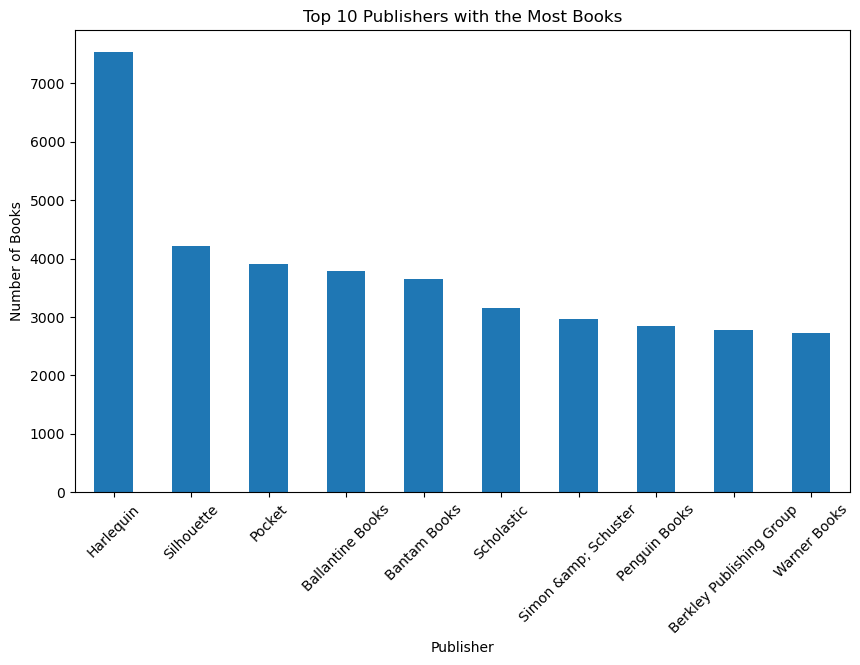

In [9]:

top_publishers = books['Publisher'].value_counts().head(10)

# Create a bar chart
plt.figure(figsize=(10, 6))
top_publishers.plot(kind='bar')
plt.title('Top 10 Publishers with the Most Books')
plt.xlabel('Publisher')
plt.ylabel('Number of Books')
plt.xticks(rotation=45)
plt.show()


### Top 10 Authors with the most books ###

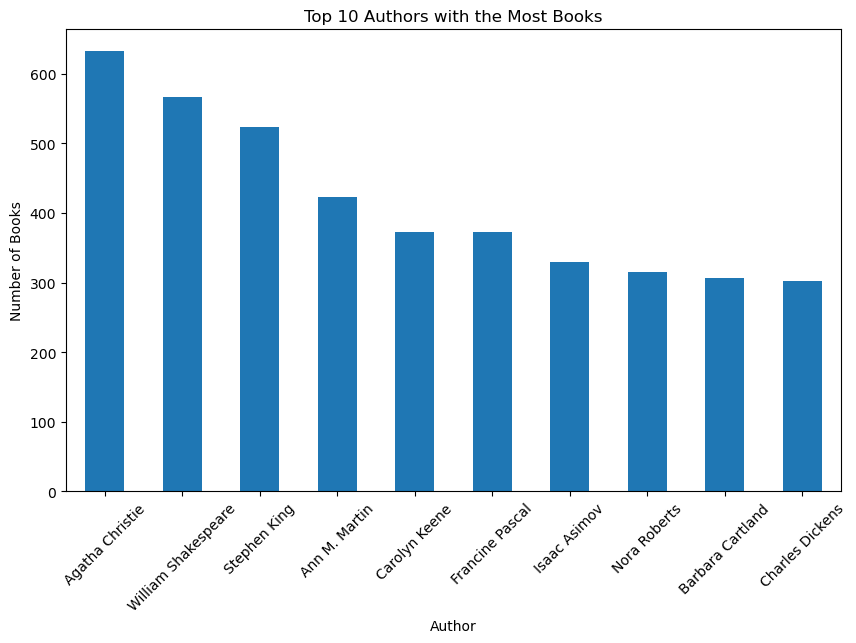

In [10]:
# top 10 Authors with the most books
top_authors = books['Book-Author'].value_counts().head(10)

# Create a bar chart
plt.figure(figsize=(10, 6))
top_authors.plot(kind='bar')
plt.title('Top 10 Authors with the Most Books')
plt.xlabel('Author')
plt.ylabel('Number of Books')
plt.xticks(rotation=45)
plt.show()

### Top 10 years when most books got published ###

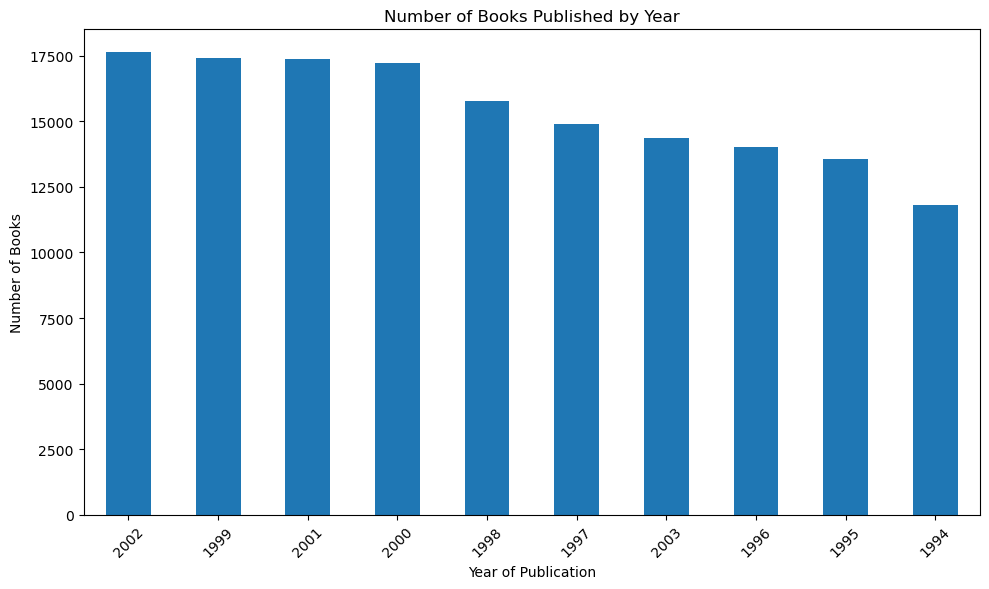

In [11]:
# Group the data by Year-Of-Publication and count the number of books in each year
year_counts = books['Year-Of-Publication'].value_counts().sort_values(ascending=False)


# Top 10 years with the most books published
top_10_years = year_counts.head(10)

# Convert years to integers
top_10_years.index = top_10_years.index.astype(int)

# Create a bar chart
plt.figure(figsize=(10, 6))
top_10_years.plot(kind='bar')
plt.title('Number of Books Published by Year')
plt.xlabel('Year of Publication')
plt.ylabel('Number of Books')

plt.xticks(rotation=45)
plt.tight_layout()

plt.show()



### Top 10 popular books ###

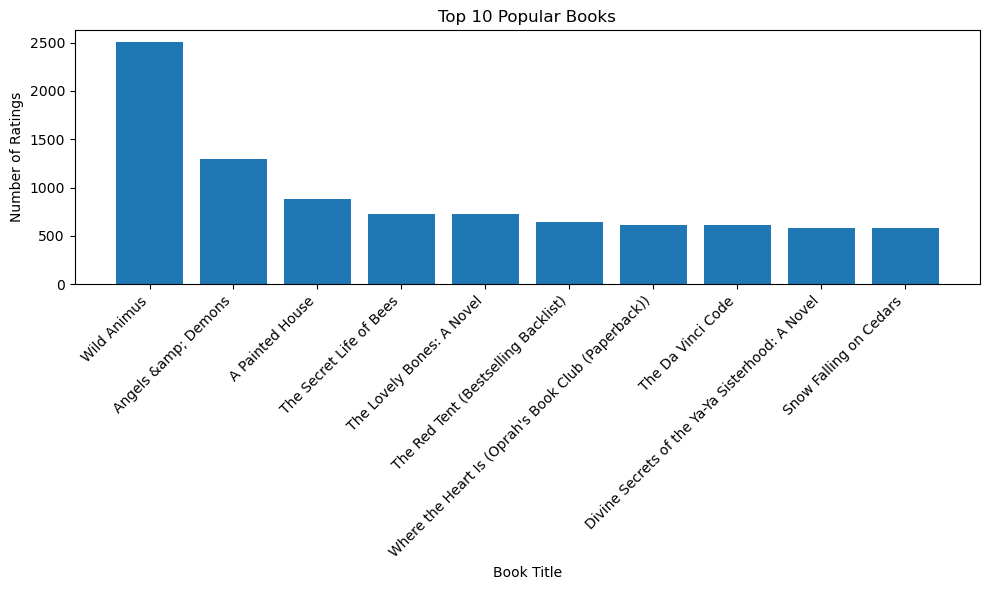

In [12]:
#Top 10 popular books
# Merge the books and ratings dataframes on the common ISBN column
merged_df = pd.merge(books, ratings, on='ISBN')

# Calculate the count of ratings for each book
book_ratings_count = merged_df['ISBN'].value_counts().head(10)

# Get the top 10 popular books based on ratings count
top_10_popular_books = books[books['ISBN'].isin(book_ratings_count.index)]

# Create a bar chart to visualize the top 10 popular books
plt.figure(figsize=(10, 6))
plt.bar(top_10_popular_books['Book-Title'], book_ratings_count)
plt.title('Top 10 Popular Books')
plt.xlabel('Book Title')
plt.ylabel('Number of Ratings')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



# Popularity based recommendation

Imagine you're in a library, surrounded by countless books on the shelves. You're not sure which book to pick and read next. Then, you notice that there's one book that many people seem to be borrowing and talking about. They say it's a captivating and enjoyable read.

Based on this buzz and the fact that so many people are interested in that book, you become curious. You think to yourself, "If so many people are loving it, maybe I should give it a try too."

That's how popularity book recommendation works. It suggests books that are popular and widely read among a large number of people. The recommendation system takes into account the books that are in high demand, frequently borrowed, or positively reviewed by many readers.

The idea behind popularity book recommendation is that if a book has gained significant attention and praise from a broad audience, it's likely to be a worthwhile read for you too. It's like joining a reading trend and exploring a book that has captured the interest and enjoyment of many others.

We will display a list of the **top 50 books based on their average ratings**. However, it's important to consider that some books may have received high ratings with only a few votes, which might not accurately reflect their overall quality. To address this, we will only include books that have received a minimum of **250 reviews**. This ensures that the ratings are more reliable and representative of the book's actual popularity and quality.

In [13]:
#we are going to used only Books and rating dataset for our popularity
#Lets merged it two datasets 
print("before merged")
print("ratings shape:",ratings.shape)
print("Books shape:",books.shape)
books_ratings=ratings.merge(books,on='ISBN')
print("after merged:",books_ratings.shape)

before merged
ratings shape: (1149780, 3)
Books shape: (271360, 8)
after merged: (1031136, 10)


#### Now, lets calculate average rating of each books and take only those books where total ratings >250(Assumption) ####

Below code takes a dataframe with book ratings, groups it by book titles, counts the number of ratings for each book, and creates a new dataframe with the book titles and their respective counts of ratings. It then renames the column representing the count of ratings to 'num_ratings' for clarity.

Group by : "https://www.kaggle.com/code/adityaghuse/introduction-to-group-by"

In [14]:
# Group the 'books_ratings' dataframe by the 'Book-Title' column and count the number of occurrences of 'Book-Rating'
num_rating_df = books_ratings.groupby('Book-Title').count()['Book-Rating'].reset_index()

# Rename the 'Book-Rating' column to 'num_ratings' in the 'num_rating_df' dataframe
num_rating_df.rename(columns={'Book-Rating':'num_ratings'}, inplace=True)

In [15]:
num_rating_df.head(2)

,Book-Title,num_ratings
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1


#### Now we have number of rating for each book,Lets figure out average rating for each book ####

Below code takes a dataframe with book ratings and names, groups it by book titles, calculates the average rating for each book, and creates a new dataframe with the book titles and their respective average ratings. It then renames the column representing the average rating to 'avg_rating' for clarity.

In [16]:
# Group the 'ratings_with_name' dataframe by the 'Book-Title' column and calculate the mean of 'Book-Rating'
#avg_rating_df = books_ratings.groupby('Book-Title').mean()['Book-Rating'].reset_index()

avg_rating_df = books_ratings.groupby('Book-Title', as_index=False)['Book-Rating'].mean()


# Rename the 'Book-Rating' column to 'avg_rating' in the 'avg_rating_df' dataframe
avg_rating_df.rename(columns={'Book-Rating':'avg_rating'}, inplace=True)

avg_rating_df.head(2)

#avg_rating_df = books_ratings.groupby('Book-Title', as_index=False)['Book-Rating'].mean()


,Book-Title,avg_rating
0,A Light in the Storm: The Civil War Diary of ...,2.25
1,Always Have Popsicles,0.00


#### Now,Lets merge both the dataframe ***num_rating_df*** and ***avg_rating_df*** and filter only those books where total ratings >250 ####

In [17]:
# Merge the 'num_rating_df' and 'avg_rating_df' DataFrames on the 'Book-Title' column
popular_df = num_rating_df.merge(avg_rating_df, on='Book-Title')
popular_df.head(2)

,Book-Title,num_ratings,avg_rating
0,A Light in the Storm: The Civil War Diary of ...,4,2.25
1,Always Have Popsicles,1,0.00


#### Now as we can see we have number of ratings and average ratings w.r.to each movie 
#### We want to keep only those movies which has total rating >250 ####

Below code filters the 'popular_df' dataframe to include only books with a minimum of 250 ratings, sorts them based on their average ratings in descending order, and finally selects the top 50 books with the highest average ratings. This helps us to  identify the most popular books with high ratings among those that have received a significant number of ratings.

In [18]:
# Filter and select the top 50 popular items with a minimum of 250 ratings, based on average rating
popular_df = popular_df[popular_df['num_ratings'] >= 250].sort_values('avg_rating', ascending=False).head(50)

In [19]:
popular_df.head(2)

,Book-Title,num_ratings,avg_rating
80434,Harry Potter and the Prisoner of Azkaban (Book 3),428,5.852804
80422,Harry Potter and the Goblet of Fire (Book 4),387,5.824289


### We have our top most 50 Popular books based on their average ratings. ###

# Collaborative filtering

Collaborative filtering analyzes the preferences and behaviors of different users, identifies patterns, and makes recommendations based on similarities between users. Instead of relying solely on your individual preferences, collaborative filtering takes into account the preferences of other users who have similar tastes to improve the accuracy of its recommendations.

Imagine you're at a bookstore and you're trying to decide which book to buy. The store owner suggests books based on what other customers with similar tastes have enjoyed.

The store owner keeps track of what books people buy and likes to see if there are any patterns. They notice that customers who have liked similar books as you also tend to enjoy a specific book that you haven't read yet.

Using this information, the store owner recommends that book to you because they think you'll probably like it too. They're using the collective knowledge of other people who have similar reading preferences to help you find books you might enjoy.

It's like having a knowledgeable friend who knows what books you might like based on what other people with similar tastes have enjoyed. The store owner is using this "wisdom of the crowd" to make personalized recommendations just for you.

collaborative filtering uses the "wisdom of the crowd" to suggest items (in this case, books) that you might like based on the preferences of similar users. It's like getting personalized recommendations from people who have similar reading interests to yours.

To build a recommender system based on how users rated books, we have two datasets: one containing information about books and another containing user ratings. We will merge these datasets to create a new dataset.

However, to focus on experienced readers, we will only consider users who have rated at least **200 books**. This ensures that we are taking into account the opinions of users who have a substantial history of reading and rating books.

Additionally, we will only include books that have received a minimum of **50 ratings**. By doing so, we prioritize books that have been reviewed by a significant number of readers, indicating a higher level of popularity or attention.


In [20]:
#Lets merged it two datasets 
print("before merged")
print("ratings shape:",ratings.shape)
print("Books shape:",books.shape)
books_ratings_collab=ratings.merge(books,on='ISBN')
print("after merged:",books_ratings_collab.shape)

before merged
ratings shape: (1149780, 3)
Books shape: (271360, 8)
after merged: (1031136, 10)


Now lets take only those user whoi had rate atleast 200 books

In [21]:
books_ratings_collab.head(2)

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...


Now we will keep only those users who have rated minimum 200 reviews for a book

In [22]:
books_ratings_collab.groupby('User-ID')['Book-Title'].count()

User-ID
2          1
8         17
9          3
10         1
12         1
          ..
278846     1
278849     4
278851    23
278852     1
278854     8
Name: Book-Title, Length: 92106, dtype: int64

#### We have total 92106 users who have rated the books,Lets find out how many of them rated at least 200 books ####

Lets find out users who have rated more than 200 books

In [23]:
# Group the 'ratings_with_name' DataFrame by 'User-ID' and count the occurrences of 'Book-Rating' for each user
# The result is a Series with the 'User-ID' as the index and the count of ratings as the values
user_ratings_count = books_ratings_collab.groupby('User-ID').count()['Book-Rating']

# Create a boolean condition by comparing each count with 200, resulting in a Series of True/False values
# True indicates that the user has rated more than 200 books, while False indicates they haven't
is_experienced_reader = user_ratings_count > 200

# Filter the 'user_ratings_count' Series by the True values, resulting in only the indices (User-IDs) of users who have rated more than 200 books
experienced_readers = user_ratings_count[is_experienced_reader].index



In [24]:
# Filter the 'ratings_with_name' DataFrame to include only ratings from experienced readers
filtered_rating = books_ratings_collab[books_ratings_collab['User-ID'].isin(experienced_readers)]
filtered_rating.shape

(474007, 10)

#### We have found a large group of 474,007 users who are avid readers and have rated at least 200 books in our dataset

Now lets include books that have received a minimum of 50 ratings. 

In [25]:
# Group the 'filtered_rating' DataFrame by 'Book-Title' and count the occurrences of 'Book-Rating' for each book
# The result is a Series with the 'Book-Title' as the index and the count of ratings as the values
book_ratings_count = filtered_rating.groupby('Book-Title').count()['Book-Rating']

# Create a boolean condition by comparing each count with 50, resulting in a Series of True/False values
# True indicates that the book has received at least 50 ratings, while False indicates it hasn't
is_popular_book = book_ratings_count >= 50

# Filter the 'book_ratings_count' Series by the True values, resulting in only the indices (Book-Titles) of popular books
popular_books = book_ratings_count[is_popular_book].index


In [26]:
# Filter the 'filtered_rating' DataFrame to include only ratings for popular books
final_ratings = filtered_rating[filtered_rating['Book-Title'].isin(popular_books)]


Now we have experience reader as well as list of books with sufficient number of ratings per each books.

Lets create a table where each row represents a specific book, and each column represents a user. The cells of the table contain the ratings given by the users for the corresponding books. This way, all the ratings for each book and user are neatly organized.
This could be helpful because it allows us to see the ratings given by each user for each book in a structured format. We can easily look up a specific book and see how different users have rated it.

Also,we can easily see how different users have rated books. By identifying users who have similar ratings for certain books, we can find people who have similar preferences. For example, if User A and User B have rated many books similarly, it suggests that they have similar tastes in books.

In [27]:
# Create a pivot table to organize book ratings data
# The pivot table will have books as rows, users as columns, and ratings as the cell values

# Group the 'final_ratings' DataFrame by 'Book-Title' and 'User-ID'
# Calculate the average rating for each combination of book and user
# The resulting table will have books as rows and users as columns

book_ratings_pivot = final_ratings.pivot_table(index='Book-Title', columns='User-ID', values='Book-Rating')


In [28]:
book_ratings_pivot.shape

(706, 810)

we have total 706 books and the ratings given by 810 different users for these books.

In [29]:
book_ratings_pivot.head(2)

User-ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
1st to Die: A Novel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Lets fill the missing values with zeros, it helps us to ensure that every cell in the table has a value, even if it represents a lack of rating.<br>
This can be useful for subsequent calculations and to maintain consistent data in the table.

In [30]:
# Fill any missing values in the book_ratings_pivot table with zeros
book_ratings_pivot.fillna(0, inplace=True)

Now lets apply  collaborative filtering techniques to make personalized recommendations based on similar user preferences.

Cosine similarity:
https://www.kaggle.com/code/adityaghuse/movie-recommendation-beginner-friendly?cellId=59&cellIds=59&kernelSessionId=136797140

In [31]:
from sklearn.metrics.pairwise import cosine_similarity

In [32]:
# calculates the similarity between vectors using a method called cosine similarity.
#In simpler terms, it takes a vector (a mathematical representation of the movie) and compares it to other vectors representing different movies.
#It calculates how similar these vectors are by measuring the cosine of the angle between them. 
#The resulting similarity values indicate how closely related the movies are based on their vector representations.
#Essentially, it helps to determine how similar two books are by looking at their numerical representations and calculating a similarity score.
similarity_scores = cosine_similarity(book_ratings_pivot)

In [33]:
similarity_scores.shape

(706, 706)

Now,Lets create a recommend function that takes a book name, finds the index of the book in **book_ratings_pivot** table,<br>
Identifies similar books based on their similarity scores, retrieves their details from the dataset, and returns a list of recommended books with their titles and author.

In [34]:
def recommend(book_name):
    # Find the index of the input book name in the pivot table
    index = np.where(book_ratings_pivot.index == book_name)[0][0]

    # Retrieve the similarity scores of the input book with other books,
    # sort them in descending order, and select the top 4 similar items
    similar_items = sorted(list(enumerate(similarity_scores[index])), key=lambda x: x[1], reverse=True)[1:5]

    # Initialize an empty list to store recommended book information
    data = []

    # Iterate through each similar item
    for i in similar_items:
        item = []

        # Fetch the relevant book details (title, author, image URL) from the 'books' dataset
        temp_df = books[books['Book-Title'] == book_ratings_pivot.index[i[0]]]

        # Append the book details to the 'item' list
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Title'].values))
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Author'].values))

        # Append the 'item' list to the 'data' list
        data.append(item)

    # Return the 'data' list containing information about the recommended books
    return data


In [35]:
recommend('Five Quarters of the Orange')

[['White Teeth: A Novel', 'Zadie Smith'],
 ['Chocolat', 'Joanne Harris'],
 ['High Fidelity', 'Nick Hornby'],
 ['How to Be Good', 'Nick Hornby']]

#### Reference:
https://medium.com/@toprak.mhmt/collaborative-filtering-3ceb89080ade#:~:text=Collaborative%20filtering%20has%20basically%20two,behind%20the%20user%2Dbased%20approach.